# Numerical integration

$$
    \int_{-1}^{+1} e^x dx = e^1 - e^{-1}
$$

In [1]:
exact_result = exp(1) - exp(-1)

2.3504023872876028

Chapter 5 of the textbook

also

[Chapter 3.5 of Digital Library of Mathematical Functions](https://dlmf.nist.gov/3.5)


## Trapezoid rule 

![!](https://upload.wikimedia.org/wikipedia/commons/d/d1/Integration_num_trapezes_notation.svg)


$$
    \int_{a}^{b} f(x)dx =  \Delta x \left[ 
       \frac{1}{2}f(x_0) + \sum_{k=1}^{N-1} f\left(x_k\right) + \frac{1}{2}f(x_N)
    \right] + O( \Delta x^2 ) 
$$
where
$$
    x_k = a + k\Delta x, \qquad \Delta x = (b - a)/N. 
$$


$$
    \int_{a}^{b} f(x)dx =  \sum_{k=0}^{N} w_k f\left(x_k\right) + O( \Delta x^2 ) 
$$
$$
    w = [\Delta x/2, \Delta x, \Delta x, \ldots,  \Delta x/2]
$$

In [2]:
function trapez(f::Function, a::Real, b::Real, N::Int)
    
    # define the lattice
    x = range(a, b, N + 1)
    Δx = x[2] - x[1]
    
    # define weights
    w = Δx .* ones(N + 1)
    w[1] = Δx / 2
    w[end] = Δx / 2


    return sum(w .* f.(x))
end

trapez (generic function with 1 method)

In [3]:
N = [2 ^ k for k = 1:30]
error_trapez = abs.(exact_result .- trapez.(exp, -1, +1, N));

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


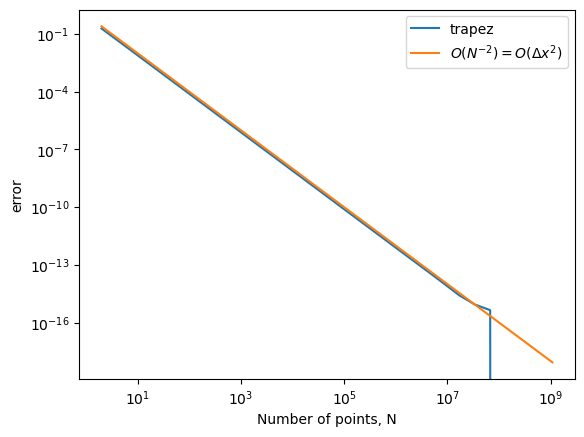

In [4]:
using PyPlot

loglog(N, error_trapez, label="trapez")
loglog(N, N .^ -2, label=L"O(N^{-2}) = O(\Delta x^2)")
xlabel("Number of points, N")
ylabel("error")
legend()
show()

## Simpson's rule

![!](https://upload.wikimedia.org/wikipedia/commons/f/fc/Simpson%27s_One-Third_Rule.gif)

$$
    \int_{a}^{b} f(x)dx = \frac{\Delta x}{3} \left[ 
        f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \cdots + 4f(x_{N-1}) + f(x_N) 
    \right] + O(\Delta x^4)
$$

## [Gauss Quadratures](http://dlmf.nist.gov/3.5.v)

$$
        \int_a^b f(x) w(x) dx = \sum_{k=1}^n w_k f(x_k) + \gamma_n \frac{f^{(2n)}(\xi)}{(2n)!},
$$
where  $\xi$ is an unknown value in between the bounds of integration, i.e., $a \leq \xi \leq b$. The constant $\gamma_n$, the coordinate grid $\{ x_k \}$ and weights $\{ w_k \}$ are determined only by $w(x)$ and the integration bounds and listed in the DLMF. The function $f(x)$ should be smooth, i.e., infinitely differentiable in the region of integration.


Our example, $\int_{-1}^{+1} e^x dx$, can be integrated by using the [Gauss–Legendre Formula](http://dlmf.nist.gov/3.5.E21) with $f(x) = e^x$ and $w(x) = 1$.

In [5]:
x = [-0.906179845938664 -0.538469310105683 0 0.538469310105683 0.906179845938664]
w = [0.236926885056189 0.478628670499366 0.568888888888889 0.478628670499366 0.236926885056189]

1×5 Matrix{Float64}:
 0.236927  0.478629  0.568889  0.478629  0.236927

In [6]:
sum(w .* exp.(x)) - exact_result

-8.24778023655881e-10

## An example of being smarter than Newton!

See the YouTube video about the history of
$$
    \pi = 4\int_0^1 \sqrt{1-x^2} dx
$$

[![IMAGE_ALT](https://img.youtube.com/vi/gMlf1ELvRzc/0.jpg)](https://www.youtube.com/watch?v=gMlf1ELvRzc)

Here is the Goverment's [definition of $\pi$](http://dlmf.nist.gov/3.12.E2). A func fact that [The State of Indiana nearly passed a law which would have made $\pi = 3.2$](https://www.youtube.com/watch?v=bFNjA9LOPsg).

Let's do some rearrangement 
$$
    4\int_0^1 \sqrt{1-x^2} dx = 2\int_{-1}^1 \sqrt{1-x^2} dx = 2\int_{-1}^1 (1-x)^{1/2}(1+x)^{1/2} dx
$$
evaluating the integral as $2\gamma_0$ for the [Gauss-Jacobi formula](http://dlmf.nist.gov/3.5.E26)

In [7]:
using SpecialFunctions

2 * gamma(0 + 1/2 + 1) * gamma(0 + 1/2 + 1) * gamma(0 + 1/2 + 1/2 + 1) / (2 * gamma(2) ^ 2) * 4 * factorial(0)

3.1415926535897936

In [8]:
π

π = 3.1415926535897...

##  [QuadGK.jl](https://github.com/JuliaMath/QuadGK.jl) - library for numerical integration

This powerful library performs 1d numerical integration using the adaptive Gauss-Kronrod quadrature. In real life projects, you should not reinvent the wheel and use this library by default. 

In [9]:
using QuadGK

In [10]:
result, error = quadgk(exp, -1, 1)

(2.3504023872876028, 2.220446049250313e-15)

In [11]:
exact_result - result

0.0

In [12]:
result, error = quadgk(x -> sqrt(1 - x ^ 2), 0, 1, rtol=1e-10)

(0.785398163400657, 5.56888573008035e-11)

In [13]:
4 * result - π

1.283506634308651e-11

## The Curse of dimensionality - 
### A need to do $N^n$ exponential number of  evaluations as a function of spatial dimension $n$

$$
    \int_{-1}^1 dx_1 \cdots \int_{-1}^1 dx_n f(x_1, \ldots, x_n) 
    \approx \underbrace{ \sum_{k_1=1}^N  \sum_{k_2=1}^N \sum_{k_3=1}^N \cdots \sum_{k_n=1}^N w_{k_1}^{(n)} \cdots w_{k_n}^{(n)} f(x_{k_1}^{(1)}, \ldots, x_{k_n}^{(n)})}_{\mbox{There are $N^n$ terms}}
$$

## Monte-Carlo integration

![!](https://upload.wikimedia.org/wikipedia/commons/2/20/MonteCarloIntegrationCircle.svg)

$$
    \int_{a}^b f(x) dx = \frac{b - a}{N}
        \sum_{k=1, \quad x_k \mbox{is random unif. distrib.}}^N f(x_k) 
        + O\left( \frac{1}{\sqrt{N}} \right) \\
     = (b-a)
          \underbrace{\frac{1}{N} \sum_{k=1}^N f(x_k)}_{\mbox{average}}
        + O\left( \frac{1}{\sqrt{N}} \right) \\
    = (b - a) \left\langle f(x) \right\rangle + O\left( \frac{1}{\sqrt{N}} \right),
$$
where $\langle f(x) \rangle$ denotes the averaging (over $N$ samples) of uniformly distributed $x$.

In [14]:
using Random

### Random uniform variable from 0 to 1

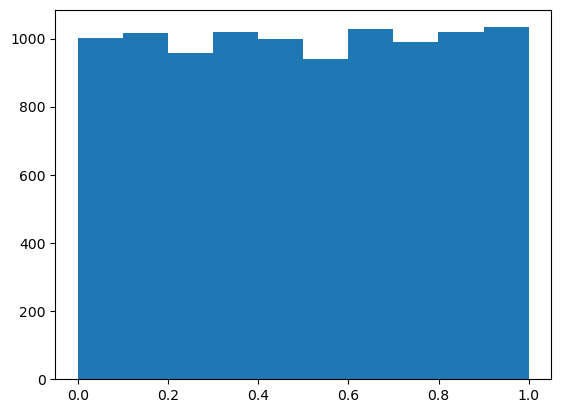

In [15]:
hist(rand(10000))
show()

Let's evaluate the following integral via the Monte Carlo method
$$
    \int_{-1}^1 dx_1 \cdots \int_{-1}^1 dx_n \, e^{x_1 + \cdots + x_n} = \left( \int_{-1}^1 e^x dx \right)^n
    = \left( e^1 - e^{-1} \right)^n.
$$

In [16]:
using Statistics

function monte_carlo_nd(f::Function, n::Int, a::Real, b::Real, N::Int)
    return (b - a)^n * mean(
        f(a .+ (b - a) .* rand(n)) 
            for indx=1:N
    )
end

monte_carlo_nd (generic function with 1 method)

In [17]:
N = [2 ^ k for k = 1:22];

In [18]:
int_mc_1d = monte_carlo_nd.(x -> exp(sum(x)), 1, -1, 1, N);

### Relative error
$$
    rerr = \left|\frac{exact - obtained}{exact}\right| = \left| 1 - \frac{obtained}{exact}\right|
$$

In [19]:
rerr_1d = abs.(1 .- int_mc_1d / (exp(1) - exp(-1)));

In [20]:
int_mc_10d = monte_carlo_nd.(x -> exp(sum(x)), 10, -1, 1, N);

rerr_10d = abs.(1 .- int_mc_10d / (exp(1) - exp(-1)) ^ 10);

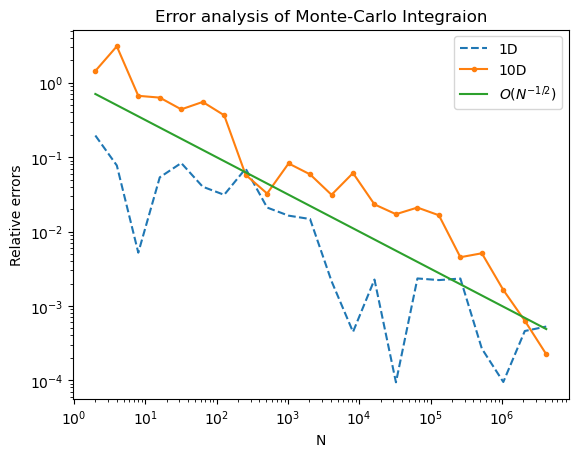

In [21]:
title("Error analysis of Monte-Carlo Integraion")
loglog(N, rerr_1d, "--", label="1D")
loglog(N, rerr_10d, ".-", label="10D")
loglog(N, N .^ (-0.5), label=L"O(N^{-1/2})")
ylabel("Relative errors")
xlabel("N")
legend()
show()

## Monte Carlo with improved samplings

$$
    \int_a^b f(x) dx = \int_a^b p(x) \frac{f(x)}{p(x)} dx 
$$
If $p(x) > 0$ and $\int_a^b p(x) dx = 1$, we can interpret $p(x)$ as the probability distribution, hence
$$
    = \left\langle \frac{f(x)}{p(x)} \right\rangle,
$$
where $\langle \quad \rangle$ is the averaging over random variable $x$ with the probability distribution $p(x)$.

### Examlple
$$
    \sqrt{2\pi} = \int_{-\infty}^{\infty} x^2 e^{-x^2 / 2} dx = \sqrt{2\pi} \int_{-\infty}^{\infty} \frac{e^{-x^2 / 2}}{\sqrt{2\pi}} x^2 dx
$$
we chose $p(x) = \frac{e^{-x^2 / 2}}{\sqrt{2\pi}}$, which is the standard normal distribution - a special normal distribution where the mean is 0 and the standard deviation is 1.
$$
   = \sqrt{2\pi} \left\langle x^2 \right\rangle,
$$
where $\langle \quad \rangle$ is the averaging over the standard normal distribution.

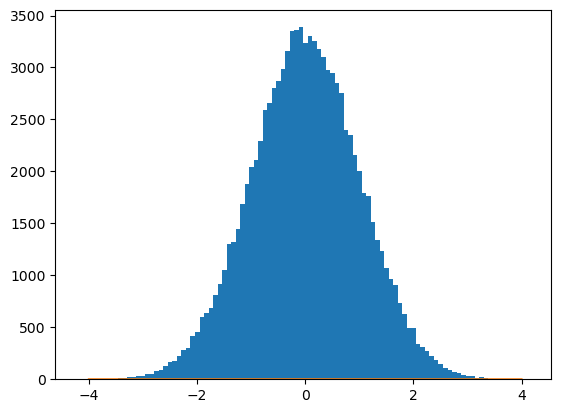

In [22]:
x = range(-4, 4, 100)

hist(randn(100000), bins=100)
plot(x, exp.(-0.5 * x .^ 2) / sqrt(2 * π))
show()


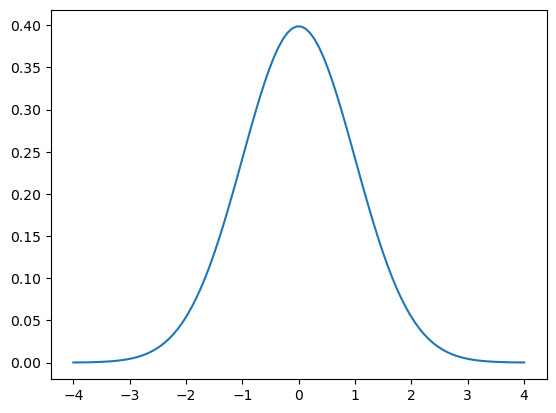

In [23]:
plot(x, exp.(-0.5 * x .^ 2) / sqrt(2 * π))
show()

In [24]:
mean(
    randn(1) .^ 2 for indx=1:100000000
)

1-element Vector{Float64}:
 1.0000870550930179